# [OpenCV-Python Tutorial] Getting Started

In this notebook, we will see how to use OpenCV-Python and some basic operations of OpenCV.

---

# Import OpenCV-Python and other packages

In [2]:
import numpy as np
import cv2
import sys
import matplotlib.pyplot as plt

print("OpenCV-Python Version %s" % cv2.__version__)

OpenCV-Python Version 4.6.0


# Open/display an image

In [ ]:
#read an image in the same directory
img = cv2.imread('images/parrots.png')

#read an image in any given path
#img = cv2.imread('C:/Users/ASUS/Desktop/OpenCV/images/parrots.png')


# If the image path is wrong, the resulting img will be none
if img is None:
    sys.exit("Could not read the image.")

# Displaying the image
cv2.imshow('image', img)
#cv2.imshow should always be followed by cv2.waitKey
# Wait for the user to press any key to close the window
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
# Check the resulting img
print (type(img))
print (img.shape)
print (img.dtype)
print (img[:2, :2, :])  # Left-upper-most few pixels of the image


<class 'numpy.ndarray'>
(576, 768, 3)
uint8
[[[60 86 84]
  [61 85 83]]

 [[61 87 84]
  [62 85 83]]]


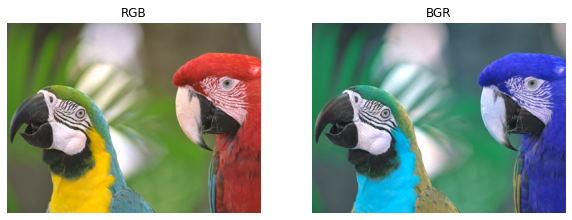

In [ ]:
# opencv reads images in BGR format while pyplot accepts RGB format
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1),plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)),plt.title('RGB'),plt.axis('off')
plt.subplot(1, 2, 2),plt.imshow(img),plt.title('BGR'),plt.axis('off')
plt.show()

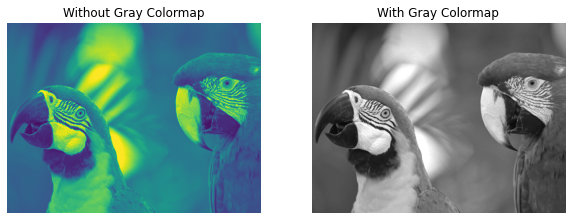

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # 0.299.R + 0.587.G + 0.114.B -> Gray
plt.figure(figsize=(10,5))
#plt.imshow by default will use "perceptially uniform" colormap(blue->yellow) for single-channel output
plt.subplot(1, 2, 1),plt.imshow(img_gray),plt.title('Without Gray Colormap'),plt.axis('off')
plt.subplot(1, 2, 2),plt.imshow(img_gray, cmap='gray'),plt.title('With Gray Colormap'),plt.axis('off')
plt.show()

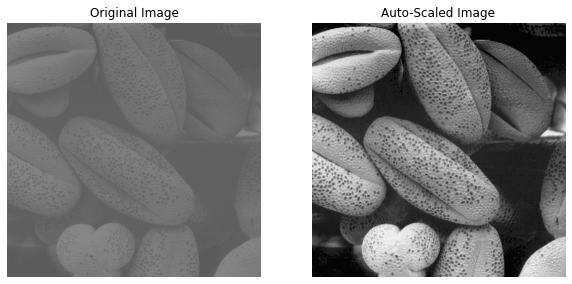

In [ ]:
#use IMREAD_GRAYSCALE to read grayscale images
img2 = cv2.imread('images/gray.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1),plt.imshow(img2, cmap='gray', vmin=0, vmax=255),plt.title('Original Image'),plt.axis('off')
#By default, plt.imshow() will try to scale your (MxN) array data to 0.0~1.0 and then map to 0~255
plt.subplot(1, 2, 2),plt.imshow(img2, cmap='gray') ,plt.title('Auto-Scaled Image'),plt.axis('off')
plt.show()
#OpenCV does not auto-scale the image
cv2.imshow('image',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

---
# Some basic operations

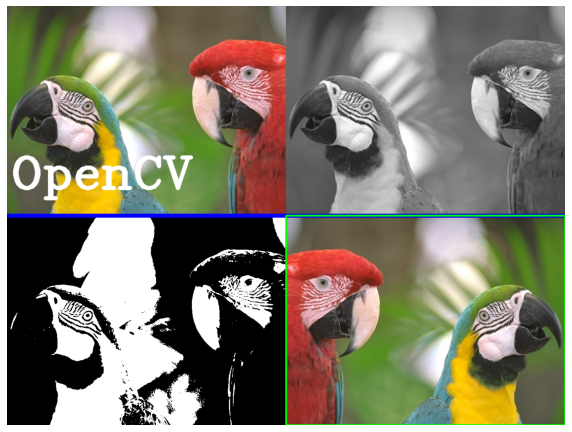

In [ ]:
height, width = img.shape[:2]
#create a blank image twice the size of the parrot image
new_img = np.zeros((2*height,2*width,3), dtype=np.uint8)
#place "img" in upper left side the blank picture
new_img[0:height, 0:width] = img

# convert "img" to grayscale values
scaled_img_gray =cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# make 1-channel grayscale image to 3-channel BGR format
scaled_img_gray_3ch = cv2.cvtColor(scaled_img_gray, cv2.COLOR_GRAY2BGR)
#place grayscale image in upper right side the blank picture
new_img[0:height, width: ] = scaled_img_gray_3ch

#convert to binary image
(thresh,scaled_img_binary) = cv2.threshold(scaled_img_gray, 127, 255, cv2.THRESH_BINARY)
 #convert from 1-channel to 3-channel
scaled_img_binary_3ch = cv2.cvtColor(scaled_img_binary, cv2.COLOR_GRAY2BGR)
new_img[height: ,0:width] = scaled_img_binary_3ch

#horizontal flip
scaled_img_horizontal = cv2.flip(img, 1)
new_img[height: ,width: ] = scaled_img_horizontal

# Draw a line using cv2.line(image, startPoint[width,height], endPoint[width,height], rgb, thinkness)
cv2.line(new_img, (0,new_img.shape[0]//2), (new_img.shape[1],new_img.shape[0]//2), (255,0,0), 10)

# Draw a rectangle using cv2.rectangle(image, topLeft, bottomRight, rgb, thinkness)
cv2.rectangle(new_img, (new_img.shape[1]//2,new_img.shape[0]//2), (new_img.shape[1],new_img.shape[0]), (0,255,0), 4)

# Put some text using cv2.putText(image, text, bottomLeft, fontType, fontScale, rgb, thinkness, lineType)
font = cv2.FONT_HERSHEY_COMPLEX
cv2.putText(new_img, 'OpenCV', (10,500), font, 4, (255,255,255), 10, cv2.LINE_AA)

plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(new_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
# Load two images
img1 = cv2.imread('images/messi5.jpg')
img2 = cv2.imread('images/opencv-logo.png')
print(img1.shape)
print(img2.shape)
cv2.imshow('messi',img1)
cv2.imshow('logo',img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

(342, 548, 3)
(92, 100, 3)


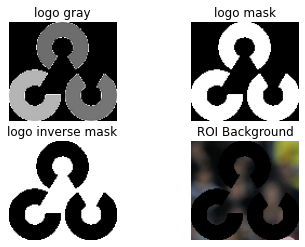

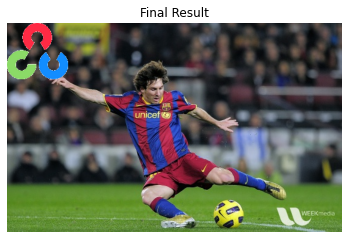

True

In [ ]:
# put logo on top-left corner
height,width = img2.shape[:2]
roi = img1[0:height, 0:width]
#create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
#black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)


plt.figure()
plt.subplot(2,2,1),plt.imshow(img2gray, cmap='gray', vmin=0, vmax=255),plt.title('logo gray'),plt.axis('off')
plt.subplot(2,2,2),plt.imshow(mask, cmap='gray', vmin=0, vmax=255),plt.title('logo mask'),plt.axis('off')
plt.subplot(2,2,3),plt.imshow(mask_inv, cmap='gray', vmin=0, vmax=255),plt.title('logo inverse mask'),plt.axis('off')
plt.subplot(2,2,4),plt.imshow(cv2.cvtColor(img1_bg,cv2.COLOR_BGR2RGB)),plt.title('ROI Background'),plt.axis('off')


# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
img1[0:height, 0:width ] = dst
plt.figure()
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.title('Final Result')
plt.axis('off')
plt.show()

#save the new image
cv2.imwrite('images/messi-with-logo.jpg',img1)

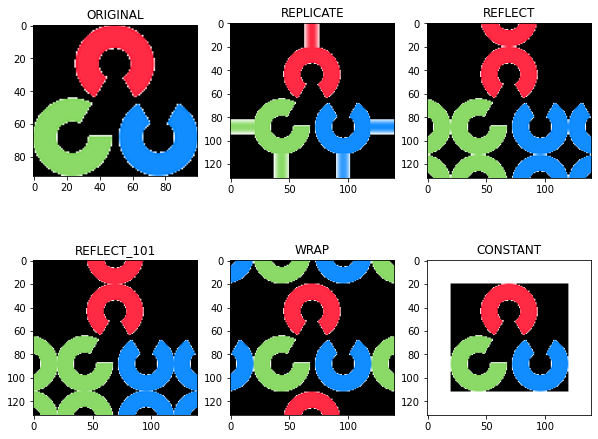

In [ ]:
#PADDING
img = cv2.imread('images/opencv-logo.png')

#Last element is replicated throughout, like this: aaaaaa|abcdefgh|hhhhhhh
replicate = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_REPLICATE)
#Border will be mirror reflection of the border elements, like this : fedcba|abcdefgh|hgfedcb
reflect = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_REFLECT)
#also BORDER_DEFAULT - Same as above, but with a slight change, like this : gfedcb|abcdefgh|gfedcba
reflect101 = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_REFLECT_101)
#Can't explain, it will look like this : cdefgh|abcdefgh|abcdefg
wrap = cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_WRAP)
#Adds a constant colored border. The value should be given as next argument.
constant= cv2.copyMakeBorder(img,20,20,20,20,cv2.BORDER_CONSTANT,value=[255,255,255])

plt.figure(figsize=(10,8))
plt.subplot(231),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('ORIGINAL')
plt.subplot(232),plt.imshow(cv2.cvtColor(replicate, cv2.COLOR_BGR2RGB)),plt.title('REPLICATE')
plt.subplot(233),plt.imshow(cv2.cvtColor(reflect, cv2.COLOR_BGR2RGB)),plt.title('REFLECT')
plt.subplot(234),plt.imshow(cv2.cvtColor(reflect101, cv2.COLOR_BGR2RGB)),plt.title('REFLECT_101')
plt.subplot(235),plt.imshow(cv2.cvtColor(wrap, cv2.COLOR_BGR2RGB)),plt.title('WRAP')
plt.subplot(236),plt.imshow(cv2.cvtColor(constant, cv2.COLOR_BGR2RGB)),plt.title('CONSTANT')

plt.show()

---
# Filtering images

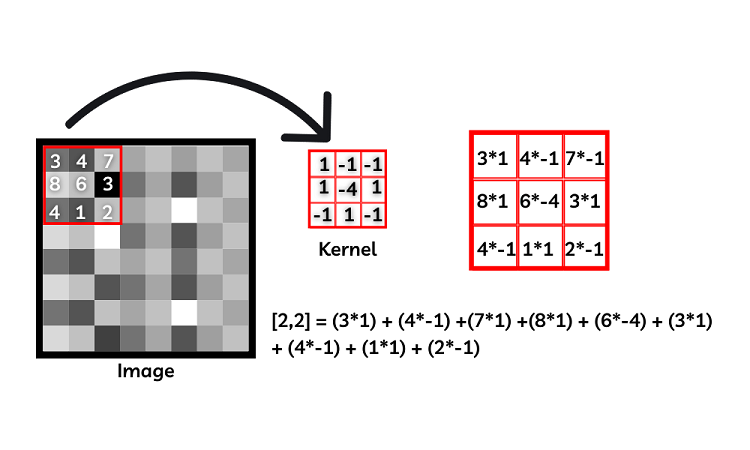

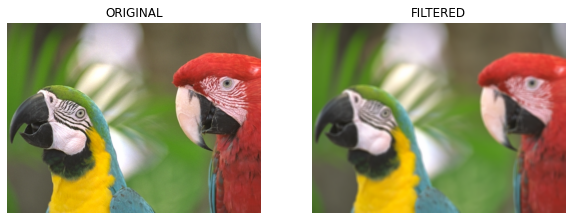

In [ ]:
# Reading the image
img = cv2.imread('images/parrots.png')

# Creating the kernel(2d convolution matrix)
kernel1 = np.ones((9, 9), np.float32)/81

# Applying the filter2D() function
img_filtered = cv2.filter2D(src=img, ddepth=-1, kernel=kernel1)

plt.figure(figsize=(10,8))
plt.subplot(121),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('ORIGINAL'),plt.axis('off')
plt.subplot(122),plt.imshow(cv2.cvtColor(img_filtered, cv2.COLOR_BGR2RGB)),plt.title('FILTERED'),plt.axis('off')
plt.show()

### some basic smoothing filters:

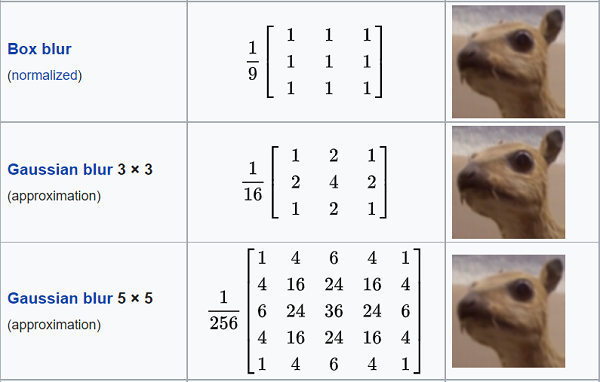

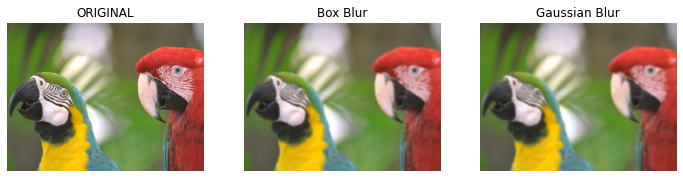

In [ ]:
#normalized box blur
box_blur = cv2.blur(src=img,ksize=(9,9),borderType =cv2.BORDER_REPLICATE)
#if both sigmas are zeros, they are computed from ksize:sigma = 0.3*((ksize-1)*0.5 - 1) + 0.8
gaussian_blur = cv2.GaussianBlur(src=img,ksize=(19,19),sigmaX=0)
plt.figure(figsize=(12,8))
plt.subplot(131),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)),plt.title('ORIGINAL'),plt.axis('off')
plt.subplot(132),plt.imshow(cv2.cvtColor(box_blur, cv2.COLOR_BGR2RGB)),plt.title('Box Blur'),plt.axis('off')
plt.subplot(133),plt.imshow(cv2.cvtColor(gaussian_blur, cv2.COLOR_BGR2RGB)),plt.title('Gaussian Blur'),plt.axis('off')
plt.show()

---
# Edge Detection

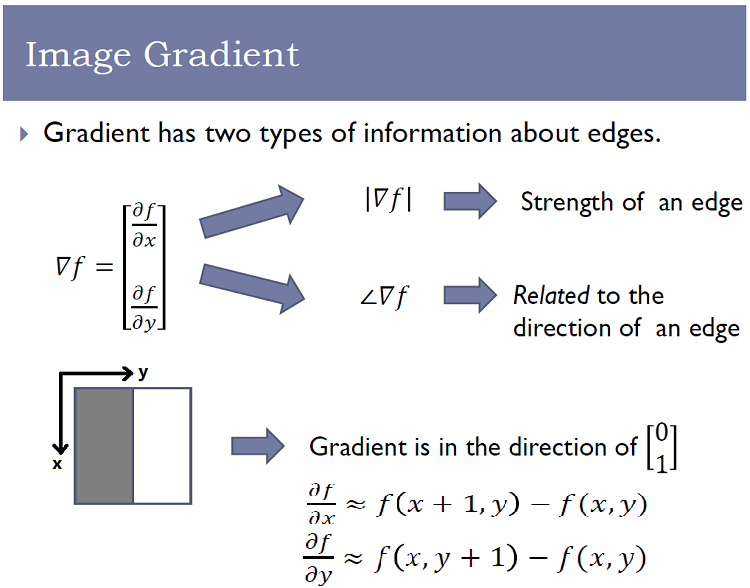


`dst = cv2.Sobel(src, ddepth, dx, dy, ksize=3, scale=1.0)`

- `src`: input image
- `ddepth`: output image depth
- `dx`: order of the derivative x
- `dy`: order of the derivative y
- `ksize`: size of the extended Sobel kernel; it must be 1, 3, 5, or 7
- `scale`: optional scale factor for the computed derivative values

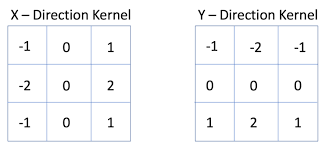

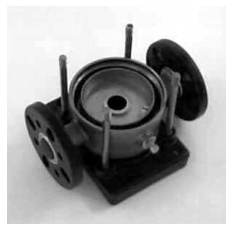

In [ ]:
# Load an image into grayscale
input_image = cv2.imread('images/wheel.png', cv2.IMREAD_GRAYSCALE)
# Make sure that the plot is drawn in grayscale
plt.imshow(input_image, cmap='gray'),plt.axis('off')
plt.show()

953.0
-754.0


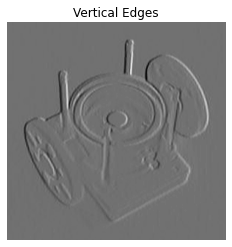

(<matplotlib.image.AxesImage at 0x2a7e14fce08>,
 Text(0.5, 1.0, 'Vertical Edges'),
 (-0.5, 298.5, 297.5, -0.5),
 None)

In [ ]:
ddepth = cv2.CV_64F  # 64-bit float output
dx = 1  # First-order derivative in x-direction
dy = 0  # NO derivative in y-direction
sobelx = cv2.Sobel(input_image, ddepth, dx, dy)
print(sobelx.max())
print(sobelx.min())
#Black-to-White transition is taken as Positive slope (it has a positive value)
#White-to-Black transition is taken as a Negative slope (It has negative value)
#pyplot maps the most negaive slope to 0 (black) and the most positive slope to 255 (white)
plt.imshow(sobelx, cmap='gray'),plt.title('Vertical Edges'),plt.axis('off'),plt.show()


There are some issues showing/saveing the same image with opencv:
- Data type is 64-bit float while opencv accepts 8-bit unsigned
- There are negative values
- All values do not fit in 8-bit unsigned

In [ ]:
# original gradient image
cv2.imshow('sobelx', sobelx)
# converting to 8-bit unsigned int - this converts negative values to max value (255)
cv2.imshow('sobelx_astype_uint8',sobelx.astype('uint8'))
# scaling values to set max to 255
cv2.imshow('sobelx_scale_uint8',(sobelx*255.0/sobelx.max()).astype('uint8'))
# scaling values to set max to 255 and make negative values positive
cv2.imshow('sobelx_scale_abs_uint8', cv2.absdiff(sobelx*255.0/sobelx.max(), 0.0).astype('uint8'))
# the function performs three operations sequentially: scaling(alpha), taking an absolute value, conversion to unsigned 8-bit
sobelx_ScaleAbs_alpha = cv2.convertScaleAbs(sobelx, alpha=255.0/sobelx.max())
cv2.imshow('sobelx_convertScaleAbs_alpha',sobelx_ScaleAbs_alpha)
#default alpha = 1
sobelx_ScaleAbs = cv2.convertScaleAbs(sobelx)
cv2.imshow('sobelx_convertScaleAbs',sobelx_ScaleAbs)
cv2.waitKey(0)
cv2.destroyAllWindows()

953.0
662.0
955.7918183370268


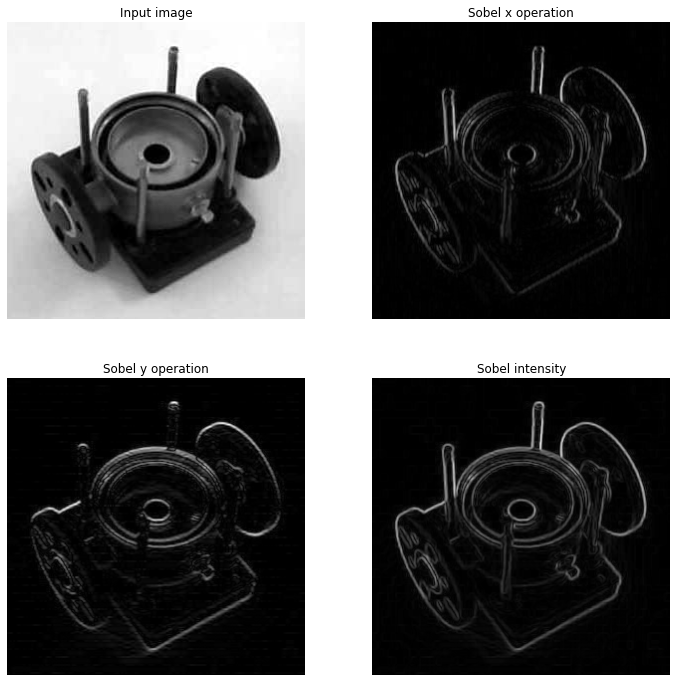

In [ ]:
# sobel operations and its magnitudes
sobelx = cv2.Sobel(input_image, cv2.CV_64F, 1, 0)
sobely = cv2.Sobel(input_image, cv2.CV_64F, 0, 1)
sobel = cv2.sqrt(cv2.addWeighted(cv2.pow(sobelx, 2.0), 1.0, cv2.pow(sobely, 2.0), 1.0, 0.0))
sobelx_abs = cv2.absdiff(sobelx, 0.0)
sobely_abs = cv2.absdiff(sobely, 0.0)
print(sobelx_abs.max())
print(sobely_abs.max())
print(sobel.max())
plt.figure(figsize=(12, 12));
plt.subplot(2, 2, 1); plt.title('Input image'); plt.axis('off');
plt.imshow(input_image, cmap='gray');
plt.subplot(2, 2, 2); plt.title('Sobel x operation'); plt.axis('off');
plt.imshow(sobelx_abs, cmap='gray')
plt.subplot(2, 2, 3); plt.title('Sobel y operation'); plt.axis('off');
plt.imshow(sobely_abs, cmap='gray');
plt.subplot(2, 2, 4); plt.title('Sobel intensity'); plt.axis('off');
plt.imshow(sobel, cmap='gray');
plt.show()
cv2.imshow('sobel', sobel.astype('uint8'))
cv2.imshow('sobel after scale', (sobel*255.0/sobel.max()).astype('uint8'))
cv2.waitKey(0)
cv2.destroyAllWindows()

---
# Getting Started With Webcam

## Webcam For Photos

In [4]:
cam = cv2.VideoCapture(0)


img_counter = 0

while True:
    ret, frame = cam.read()
    if not ret:
        print("failed to grab frame")
        break
    cv2.imshow("python webcam screenshot app", frame)

    k = cv2.waitKey(1)
    if k%256 == 27:
        # ESC pressed
        print("Escape hit, closing...")
        break
    elif k%256 == 32:
        # SPACE pressed
        img_name = "opencv_frame_{}.png".format(img_counter)
        cv2.imwrite(img_name, frame)
        print("{} written!".format(img_name))
        img_counter += 1

cam.release()

cv2.destroyAllWindows()

opencv_frame_0.png written!
opencv_frame_1.png written!
opencv_frame_2.png written!
Escape hit, closing...


## Webcam For Videos

### Real-time

In [ ]:


# This will return video from the first webcam on your computer.
cap = cv2.VideoCapture(0)

# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('videos/output.avi', fourcc, 20.0, (640, 480),isColor = False)

# loop runs if capturing has been initialized.
while(True):
    # reads frames from a camera
    # ret checks return at each frame
    ret, frame = cap.read()

    # Converts to grayscale space, OCV reads colors as BGR
    # frame is converted to gray
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # output the frame
    out.write(gray)

    # The original input frame is shown in the window
    cv2.imshow('Original', frame)

    # The window showing the operated video stream
    cv2.imshow('Gray', gray)


    # Wait for 'a' key to stop the program
    if cv2.waitKey(1) & 0xFF == ord('a'):
        break

# Close the window / Release webcam
cap.release()
# After we release our webcam, we also release the output
out.release()
# De-allocate any associated memory usage
cv2.destroyAllWindows()

### Offline

In [ ]:
# Create a VideoCapture object and read from input file
cap = cv2.VideoCapture('videos/ted.mp4')

# Check if camera opened successfully
if (cap.isOpened()== False):
    print("Error opening video file")

# Read until video is completed
while(cap.isOpened()):

    # Capture frame-by-frame
    ret, frame = cap.read()
    if ret == True:
        # Display the resulting frame
        cv2.imshow('Frame', frame)

        # Press Q on keyboard to exit
        if cv2.waitKey(25) & 0xFF == ord('q'):
            break

    # Break the loop
    else:
        break

# When everything done, release
# the video capture object
cap.release()

# Closes all the frames
cv2.destroyAllWindows()



---
# Bonus: SIFT Detector/Descriptor

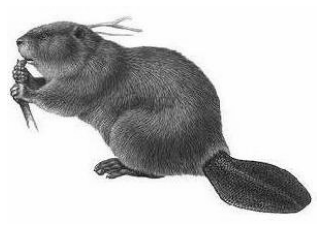

In [ ]:
# Load an image
beaver = cv2.imread('images/beaver.png')
plt.imshow(cv2.cvtColor(beaver, cv2.COLOR_BGR2RGB)),plt.axis('off')
plt.show()

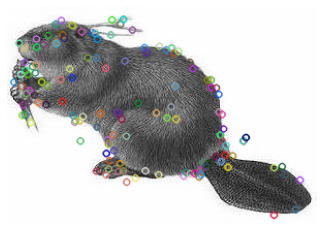

In [ ]:
# Convert image color(BGR->Grayscale)
gray = cv2.cvtColor(beaver, cv2.COLOR_BGR2GRAY)

# SIFT feature detector/descriptor
#sift = cv2.xfeatures2d.SIFT_create() in opencv 3 version
sift = cv2.SIFT_create()
# 2nd pos argument is a mask indicating a part of image to be searched in
kp, des = sift.detectAndCompute(gray,None) #returns key points and their descriptors

# Display the SIFT features
beaver_sift = cv2.drawKeypoints(beaver, kp, None)
plt.imshow(cv2.cvtColor(beaver_sift, cv2.COLOR_BGR2RGB)),plt.axis('off')
plt.show()

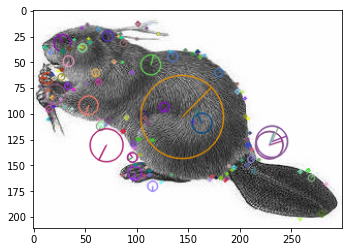

In [ ]:
# Display the rich SIFT features - show size and orientation of each key point
beaver_sift2 = cv2.drawKeypoints(beaver, kp, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(cv2.cvtColor(beaver_sift2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Inspect the keypoints
print (type(kp))
print (len(kp))

print (type(kp[0]))
print (dir(kp[0]))


<class 'list'>
144
<class 'cv2.KeyPoint'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'angle', 'class_id', 'convert', 'octave', 'overlap', 'pt', 'response', 'size']


In [ ]:
# A keypoint's property
# kp is sorted by position
print (kp[93].angle) # Orientation
print (kp[93].class_id)
print (kp[93].octave)
print (kp[93].pt) # Position
print (kp[93].response) #Strength of keypoint
print (kp[93].size) # Size of meaningful neighbourhood

314.4209899902344
-1
7340548
(144.02984619140625, 103.08197021484375)
0.0774703398346901
80.10929870605469


In [ ]:
# Inspect the descriptors
print (type(des))
print (des.shape)
print (des.dtype)
print (des[0, :])

<class 'numpy.ndarray'>
(144, 128)
float32
[ 57.  42.  30.  40.  49.   1.   0.  20.  37.  35.  16.  29.  43.   2.
   6.  50.  19.  20.  14.   7.  11.  28.  37. 109.  65.   0.   0.   1.
   2.   7.  28. 150.  27.  40.  58.  50.  13.   0.   0.   9. 150.  34.
  24.  23.   5.   0.   8. 134.  50.   8.   3.   0.   0.   0.  51. 150.
   3.   0.   0.   0.   0.   1.  28.  95.  24.   5.  14.  31.  21.  16.
   9.  15. 150.  65.   3.   5.   2.   1.   7.  53. 150.  28.   0.   0.
   0.   0.   2.  45.   4.   0.   0.   0.   0.   1.   2.   7.  21.   2.
   1.   4.   9.  22.  22.  28. 150.  11.   0.   0.   0.   0.  11.  86.
 150.   7.   0.   0.   0.   0.   0.  31.   3.   0.   0.   0.   0.   0.
   0.   2.]


---
# Bonus: Feature Matching

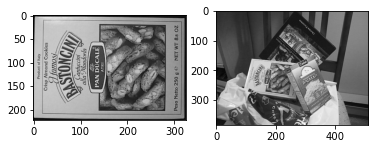

In [ ]:
# Open and show images
img1 = cv2.imread('images/box.png')
img2 = cv2.imread('images/box_in_scene.png')

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# SIFT feature extracting
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

print('Image 1 - %d feature detected' % des1.shape[0])
print('Image 2 - %d feature detected' % des2.shape[0])

Image 1 - 604 feature detected
Image 2 - 969 feature detected


`BFMatcher` takes the descriptor of one feature in first set and is matched with all other features in second set
using some distance calculation and returns the closest one.
- `normType` specifies the distance measurement
- if `crossCheck` is `True` matcher only returns those features that match each other in both sets

In [ ]:
# BFMatcher(Brute Force Matcher) with defalut setting
bf = cv2.BFMatcher(normType=cv2.NORM_L2,crossCheck=False)
matches = bf.knnMatch(des1, des2, k=2) #only the first best matches for each keypoint is returned
print('%d matches' % len(matches))

604 matches


In [ ]:
# Inspect matcher results
print (type(matches))
print (len(matches))
print (type(matches[0]))
print (len(matches[0]))

print (type(matches[0][0]))
print (dir(matches[0][0]))

<class 'list'>
604
<class 'list'>
2
<class 'cv2.DMatch'>
['__class__', '__delattr__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', 'distance', 'imgIdx', 'queryIdx', 'trainIdx']


In [ ]:
print (matches[0][0].distance) #distance between descriptors
print (matches[0][0].queryIdx) #index of descriptor in img1 descriptors
print (matches[0][0].trainIdx) #index of descriptor in img2 descriptors
print (matches[0][0].imgIdx)
print (matches[0][1].distance)
print (matches[0][1].queryIdx)
print (matches[0][1].trainIdx)
print (matches[0][1].imgIdx)

212.0023651123047
0
336
0
256.8598937988281
0
717
0


In [ ]:
# Apply ratio test as in David Rowe's paper
good_matches = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good_matches.append(m)
print('%d matches' % len(good_matches))

80 matches


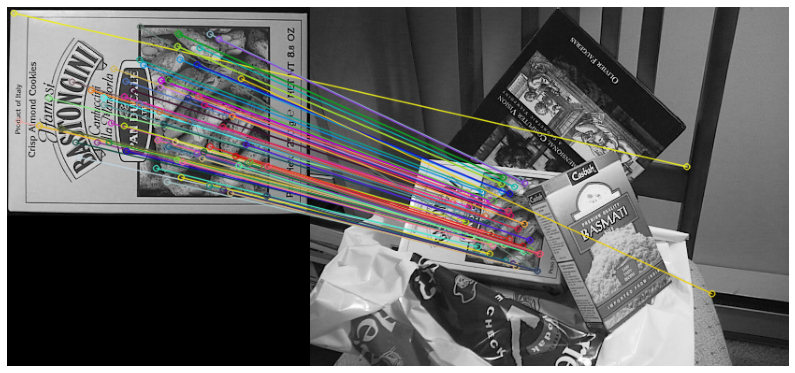

In [ ]:
img3 = cv2.drawMatches(img1,kp1,img2,kp2,good_matches,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(14,7))
plt.imshow(cv2.cvtColor(img3, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()